In [1]:
import classes as cl
import network
import travel_time as travel
import partitioning as pa
import simulated_annealing as sa
import numpy as np
import plot
import import_ipynb
import heuristic as heu
import main1
import set_decision as decision
import sampling 
import networkx as nx
import sorting

ModuleNotFoundError: No module named 'ricca'

In [ ]:
grid, V_stops, V_blocks, V_existing, V_possible, pop, all_facilities, total_pop, travel2 = main1.network_details()

n, m, e, p, p_min, p_max, d_b, d_s = main1.parameters()

Cut. If there is no possible location in the piece, merge it and find a way to recut.

$\textbf{Moves:}$

$1.$ Move out the furthest block included by the biggest district

$2.$ Move in the closest block not included by the smallest district


$\textbf{In each iteration,}$

if the population of the biggest district exceeds the upper bound, perform Move 1. 

If the population of the smallest district less than the lower bound, perform Move 2.


Lower and upper bounds $ := (1 \pm \epsilon) \times P_{average} \hspace{1mm} $
    
where $\epsilon = 0.1$ and $P_{average}:$ average population


$\circ:$ bus stop

$\times:$ closed facility

$\square$ center of a district 

You can see the coordinates of a district on the graph and check its districts' population in the output.

$\textbf{Example:}$ The output (5, 0): 2162 in the iteration = 0 says that population of the district centered at (5, 0) had  the population 2162 at the beginning.

$\textbf{First plot:}$ Initial assignment, i.e., blocks are assigned to the closest facility.

$\textbf{Second plot:}$ Final assignment. Max iteration is set to 100. Districts are rebalanced at the 15th iteration.

Lower bound:  2104.38
Upper bound:  2572.02
->after loops, iteration = 0 {(2, 11): 2472, (3, 0): 1698, (7, 10): 1421, (8, 6): 4617, (14, 2): 1483}
->after loops, iteration = 1 {(2, 11): 2426, (3, 0): 1698, (7, 10): 1510, (8, 6): 4574, (14, 2): 1483}
->after loops, iteration = 2 {(2, 11): 2426, (3, 0): 1698, (7, 10): 1578, (8, 6): 4446, (14, 2): 1543}
->after loops, iteration = 3 {(2, 11): 2426, (3, 0): 1756, (7, 10): 1578, (8, 6): 4344, (14, 2): 1587}
->after loops, iteration = 4 {(2, 11): 2384, (3, 0): 1756, (7, 10): 1670, (8, 6): 4294, (14, 2): 1587}
->after loops, iteration = 5 {(2, 11): 2384, (3, 0): 1756, (7, 10): 1670, (8, 6): 4189, (14, 2): 1692}
->after loops, iteration = 6 {(2, 11): 2384, (3, 0): 1756, (7, 10): 1783, (8, 6): 4076, (14, 2): 1692}
->after loops, iteration = 7 {(2, 11): 2384, (3, 0): 1756, (7, 10): 1850, (8, 6): 3959, (14, 2): 1742}
->after loops, iteration = 8 {(2, 11): 2384, (3, 0): 1756, (7, 10): 1850, (8, 6): 3829, (14, 2): 1872}
->after loops, iteration = 9 

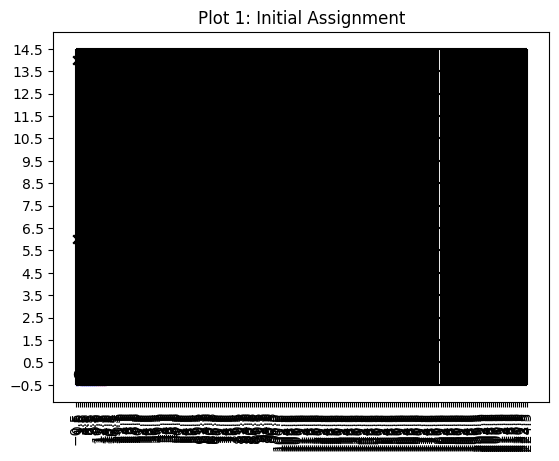

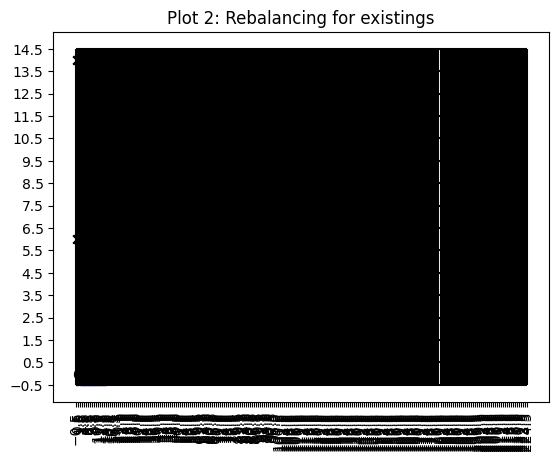

In [ ]:
""" Rebalancing """

#new_value = V_possible[(6, 4)]
#new_open = {(5, 0): new_value}
#new_locations = {**V_existing, **new_open} 

max_iterations = 100
epsilon = 0.1

locator, assigner, district_populations = decision.rebalancing(m, n, V_existing, V_possible, V_stops, V_blocks, all_facilities, travel2, V_existing, epsilon, total_pop, max_iterations)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, locator, assigner, "Plot 2: Rebalancing for existings")

In [ ]:
""""Initial Solution"

locator, assigner = sa.generate_initial_solution(V_blocks, V_existing, V_possible, partitioning)

"Neighbor Generation"


max = 7
epsilon = 0.1

neighbor_locator, neighbor_assigner, assigned_pop = sa.make_neighbor_solution(V_blocks, V_existing, V_possible, max, epsilon, total_pop, assigner, travel2)

"Simulated Annealing"

max_iterations = 2000  
initial_temperature = 1.0  
cooling_rate = 0.0001
epsilon = 0.2
C = 1


final_assigner, final_locator, final_energy, locators = sa.simulated_annealing(V_blocks, V_existing, V_possible, partitioning, 
                                            travel2, max_iterations, initial_temperature, cooling_rate, max, epsilon, total_pop, C)


obj_value = sa.objective_function(V_blocks, V_existing, V_possible, travel2, neighbor_assigner)
print("Objective value of the initial solution: ", obj_value)
print("Objective Function Value (Max Access):", final_energy)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, locator, assigner, "SA 1: Initial Solution")
plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, final_locator, final_assigner, "SA 1: Final Solution")

#count = 0
#for i in V_blocks.keys():
#    for j in all_facilities.keys():
#        if assigner[(i, j)] == 1:
#            count = count + 1"""

'"Initial Solution"\n\nlocator, assigner = sa.generate_initial_solution(V_blocks, V_existing, V_possible, partitioning)\n\n"Neighbor Generation"\n\n\nmax = 7\nepsilon = 0.1\n\nneighbor_locator, neighbor_assigner, assigned_pop = sa.make_neighbor_solution(V_blocks, V_existing, V_possible, max, epsilon, total_pop, assigner, travel2)\n\n"Simulated Annealing"\n\nmax_iterations = 2000  \ninitial_temperature = 1.0  \ncooling_rate = 0.0001\nepsilon = 0.2\nC = 1\n\n\nfinal_assigner, final_locator, final_energy, locators = sa.simulated_annealing(V_blocks, V_existing, V_possible, partitioning, \n                                            travel2, max_iterations, initial_temperature, cooling_rate, max, epsilon, total_pop, C)\n\n\nobj_value = sa.objective_function(V_blocks, V_existing, V_possible, travel2, neighbor_assigner)\nprint("Objective value of the initial solution: ", obj_value)\nprint("Objective Function Value (Max Access):", final_energy)\n\nplot.plot(m, n, V_blocks, V_existing, V_possib

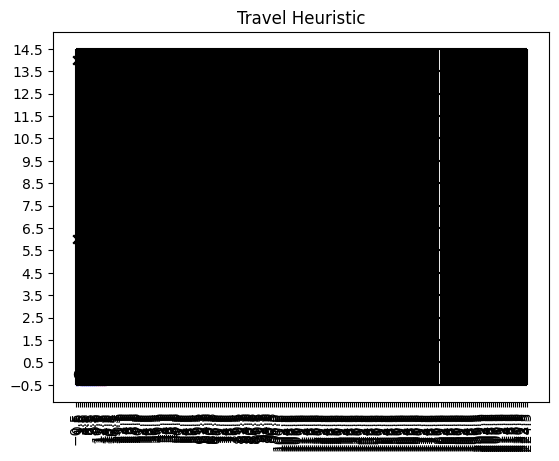

In [ ]:
import heuristic as heu

located = V_existing

location, allocation = heu.assignment_travel(V_blocks, all_facilities, located, travel2)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "Travel Heuristic")

In [ ]:
"""# Lower and Upper bounds on the population of each district for populating nearly equal

open_facilities = []
for j in all_facilities.keys():
    if final_locator[j] == 1:
            open_facilities.append(j)
lower_bound = (1 - epsilon)* total_pop / len(open_facilities)
upper_bound = (1 + epsilon)* total_pop / len(open_facilities)
print(lower_bound)
print(upper_bound)"""


'# Lower and Upper bounds on the population of each district for populating nearly equal\n\nopen_facilities = []\nfor j in all_facilities.keys():\n    if final_locator[j] == 1:\n            open_facilities.append(j)\nlower_bound = (1 - epsilon)* total_pop / len(open_facilities)\nupper_bound = (1 + epsilon)* total_pop / len(open_facilities)\nprint(lower_bound)\nprint(upper_bound)'

In [ ]:
""""-------- Walk Time ---------"

for source in all_facilities.keys():
    walk_to_source = travel.walk_time_to_source(grid, source)
    #print(source)
    #max_key = max(travel_to_source, key = travel_to_source.get)
    #print(max_key, travel_to_source[max_key])
    #print(travel_to_source)

walk = travel.walk_time(grid, V_existing, V_possible)


"-------- Walk Heuristic --------"

import heuristic as heu

locations = V_existing
location_walk, allocation_walk = heu.assignment_walk(V_blocks, all_facilities, locations, walk)
plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location_walk, allocation_walk, "Walk Heuristic")"""

'"-------- Walk Time ---------"\n\nfor source in all_facilities.keys():\n    walk_to_source = travel.walk_time_to_source(grid, source)\n    #print(source)\n    #max_key = max(travel_to_source, key = travel_to_source.get)\n    #print(max_key, travel_to_source[max_key])\n    #print(travel_to_source)\n\nwalk = travel.walk_time(grid, V_existing, V_possible)\n\n\n"-------- Walk Heuristic --------"\n\nimport heuristic as heu\n\nlocations = V_existing\nlocation_walk, allocation_walk = heu.assignment_walk(V_blocks, all_facilities, locations, walk)\nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location_walk, allocation_walk, "Walk Heuristic")'

In [ ]:
"""# Simulated annealing for walk_time


"Initial Solution"

locator_walk, assigner_walk = sa.generate_initial_solution(V_blocks, V_existing, V_possible, partitioning)

"Neighbor Generation"

total_pop = np.sum(pop)
max = 7
epsilon = 0.1

neighbor_locator_walk, neighbor_assigner_walk, assigned_pop = sa.make_neighbor_solution(V_blocks, V_existing, V_possible, max, epsilon, total_pop, assigner_walk, walk)

assigned_pop

"Simulated Annealing"

max_iterations = 2000  
initial_temperature = 1.0  
cooling_rate = 0.0001
epsilon = 0.2
C = 1

final_assigner_walk, final_locator_walk, final_energy_walk, locators_walk = sa.simulated_annealing(V_blocks, V_existing, V_possible, partitioning, 
                                            walk, max_iterations, initial_temperature, cooling_rate, max, epsilon, total_pop, C)

print("Objective Function Value (Max Access):", final_energy_walk)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, final_locator_walk, final_assigner_walk, "SA 1 Walk: Final Solution")"""

'# Simulated annealing for walk_time\n\n\n"Initial Solution"\n\nlocator_walk, assigner_walk = sa.generate_initial_solution(V_blocks, V_existing, V_possible, partitioning)\n\n"Neighbor Generation"\n\ntotal_pop = np.sum(pop)\nmax = 7\nepsilon = 0.1\n\nneighbor_locator_walk, neighbor_assigner_walk, assigned_pop = sa.make_neighbor_solution(V_blocks, V_existing, V_possible, max, epsilon, total_pop, assigner_walk, walk)\n\nassigned_pop\n\n"Simulated Annealing"\n\nmax_iterations = 2000  \ninitial_temperature = 1.0  \ncooling_rate = 0.0001\nepsilon = 0.2\nC = 1\n\nfinal_assigner_walk, final_locator_walk, final_energy_walk, locators_walk = sa.simulated_annealing(V_blocks, V_existing, V_possible, partitioning, \n                                            walk, max_iterations, initial_temperature, cooling_rate, max, epsilon, total_pop, C)\n\nprint("Objective Function Value (Max Access):", final_energy_walk)\n\nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, final_locator_walk, final_a

In [ ]:
"-------- SA 2: simulated annealing_pop - Population Focused ---------"

"""max_pop = 7
epsilon = 0.1
max_iterations = 2000  
initial_temperature = 1.0  
cooling_rate = 0.0001
epsilon = 0.2
C = 1
beta = 2 
K = 2

locations = V_existing                                            


ass, loc, energy, assigners, workload = sa.simulated_annealing_pop(V_blocks, V_existing, V_possible, travel2, max_iterations, initial_temperature, cooling_rate, 
                                                                        max_pop, epsilon, C, location, allocation, beta, K, total_pop, all_facilities, locations)

print("Objective Function Value (Max Access):", energy)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "SA 2: Initial Solution")

#for i in range(len(assigners)):
#    assig = assigners[i]
#    plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, assig, "SA 2: Initial Solution")
    
plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, loc, ass, "SA 2: Final Solution")"""


'max_pop = 7\nepsilon = 0.1\nmax_iterations = 2000  \ninitial_temperature = 1.0  \ncooling_rate = 0.0001\nepsilon = 0.2\nC = 1\nbeta = 2 \nK = 2\n\nlocations = V_existing                                            \n\n\nass, loc, energy, assigners, workload = sa.simulated_annealing_pop(V_blocks, V_existing, V_possible, travel2, max_iterations, initial_temperature, cooling_rate, \n                                                                        max_pop, epsilon, C, location, allocation, beta, K, total_pop, all_facilities, locations)\n\nprint("Objective Function Value (Max Access):", energy)\n\nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "SA 2: Initial Solution")\n\n#for i in range(len(assigners)):\n#    assig = assigners[i]\n#    plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, assig, "SA 2: Initial Solution")\n    \nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, loc, ass, "SA 2: Final Solution")'

In [ ]:
"""import heuristic as heu

new_value = V_possible[(5, 0)]
new_open = {(5, 0): new_value}
new_locations = {**V_existing, **new_open} 
location, allocation = heu.assignment_travel(V_blocks, all_facilities, new_locations, travel2)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "Travel Heuristic")"""

'import heuristic as heu\n\nnew_value = V_possible[(5, 0)]\nnew_open = {(5, 0): new_value}\nnew_locations = {**V_existing, **new_open} \nlocation, allocation = heu.assignment_travel(V_blocks, all_facilities, new_locations, travel2)\n\nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "Travel Heuristic")'

549 -> iteration = 250
4102270
{(3, 8): 2634, (6, 14): 2082, (10, 12): 2126, (11, 6): 2620, (14, 5): 2156}
Objective Function Value (Max Access): 552

In [ ]:
"-------- SA 2: simulated annealing_pop - A New Facility ---------"

"""max_pop = 7
epsilon = 0.1
max_iterations = 2000  
initial_temperature = 1.0  
cooling_rate = 0.0001
epsilon = 0.2
C = 1
beta = 2 
K = 2                                        


ass, loc, energy, assigners, workload = sa.simulated_annealing_pop(V_blocks, V_existing, V_possible, travel2, max_iterations, initial_temperature, cooling_rate, 
                                                                        max_pop, epsilon, C, location, allocation, beta, K, total_pop, all_facilities, new_locations)

print("Objective Function Value (Max Access):", energy)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "Travel Heuristic")

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "SA 2: Initial Solution")

#for i in range(len(assigners)):
#    assig = assigners[i]
#    plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, assig, "SA 2: Initial Solution")
    
plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, loc, ass, "SA 2: Final Solution")"""

'max_pop = 7\nepsilon = 0.1\nmax_iterations = 2000  \ninitial_temperature = 1.0  \ncooling_rate = 0.0001\nepsilon = 0.2\nC = 1\nbeta = 2 \nK = 2                                        \n\n\nass, loc, energy, assigners, workload = sa.simulated_annealing_pop(V_blocks, V_existing, V_possible, travel2, max_iterations, initial_temperature, cooling_rate, \n                                                                        max_pop, epsilon, C, location, allocation, beta, K, total_pop, all_facilities, new_locations)\n\nprint("Objective Function Value (Max Access):", energy)\n\nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "Travel Heuristic")\n\nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "SA 2: Initial Solution")\n\n#for i in range(len(assigners)):\n#    assig = assigners[i]\n#    plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, assig, "SA 2: Initial Solution")\n    \nplot.plot(m, n, V_blocks, V_ex

In [ ]:
"-------- SA 3: simulated annealing_pop - Population and Access Focused ---------"


"""max_pop = 7
epsilon = 0.1
max_iterations = 2000  
initial_temperature = 1.0  
cooling_rate = 0.0001
epsilon = 0.2
C = 1
beta = 2
K = 2

ass_3, loc_3, energy_3 = sa.simulated_annealing_access(grid, V_blocks, V_existing, V_possible, travel2, max_iterations, initial_temperature, cooling_rate, m, epsilon, C, location, allocation, beta, K, total_pop)

print("Objective Function Value (Max Access):", energy_3)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, loc_3, ass_3, "SA 3: Final Solution")"""

'max_pop = 7\nepsilon = 0.1\nmax_iterations = 2000  \ninitial_temperature = 1.0  \ncooling_rate = 0.0001\nepsilon = 0.2\nC = 1\nbeta = 2\nK = 2\n\nass_3, loc_3, energy_3 = sa.simulated_annealing_access(grid, V_blocks, V_existing, V_possible, travel2, max_iterations, initial_temperature, cooling_rate, m, epsilon, C, location, allocation, beta, K, total_pop)\n\nprint("Objective Function Value (Max Access):", energy_3)\n\nplot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, loc_3, ass_3, "SA 3: Final Solution")'

Notes

2) Main1 & Main2 seperation - get rid of the codes in this page.
3) Change "existings" in the plot module with "locations". Set markers, colors, etc. accordingly.  (For all modules.)(sim_ann_pop and several modules are changed.)
4) All facilities should be a parameter from now on. Delete all unnecessary codes related to that. (Locations can help to get rid of more lines. For ex., no need to define open_facilities.)

5) Whhy is SA2_pop accepting a worst solution? See "a new facility" results.

---6) Add Tabu Search. (Taslagi kodla. Detaylar icin notu oku. Non-random neighbor tanimi icin mathexchange i oku.)
---7) Change the definitions of neighborhoods. 
---8) Parameter tunning. (tempature)

9) Can I define a new SA on the sets of opened facilities?
10) Get district populations after every print.
11) Variable fixing.